# Part 1: Introduction

In this model we are going to be looking attempting to load in one of the Skikit Learn packages and performing Linear Regression on the data. Remember the steps:


1. Load in the data (X and Y)
2. Instantiate the model
3. Train ("fit") the model
4. Evaluate the model

Let's begin!

In [ ]:
# load in our packages

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# Part 2: Load in the data (X and Y)

In [ ]:
data = load_boston()

In [ ]:
#sklearn datasets are considered as dictionaries
type(data)

sklearn.utils.Bunch

In [ ]:
#this means we can inspect their data through their items and keys!
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

### Data Inspection

In [ ]:
#inspecting shape of the data
data.data.shape

(506, 13)

In [ ]:
data.target.shape

(506,)

In [ ]:
#printing off a list of features
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
print(data.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
print(data.filename)
#a csv file!

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/boston_house_prices.csv


In [ ]:
#to properly inspect the CSV data, we can make a Pandas Dataframe
bd = pd.DataFrame(data.data, columns = data.feature_names)

bd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#we still need to add in the price, our target.
bd["PRICE"] = data.target

bd.PRICE.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [ ]:
# now let us inspect the data and view summary statistics
bd.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.9

In [ ]:
bd.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Visualization

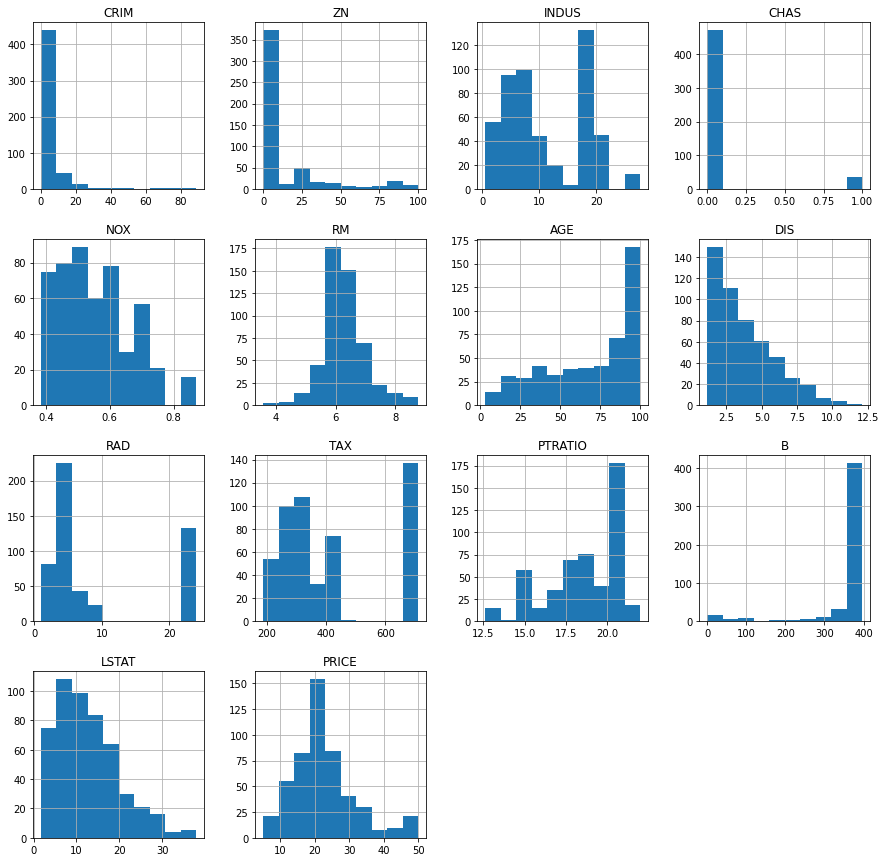

In [ ]:
# First, let us get a histogram of all numerical columns.
plt.rcParams['figure.figsize'] = [15, 15] # make the plot bigger so the subplots don't overlap
bd.hist(); # use a semicolon to supress return value

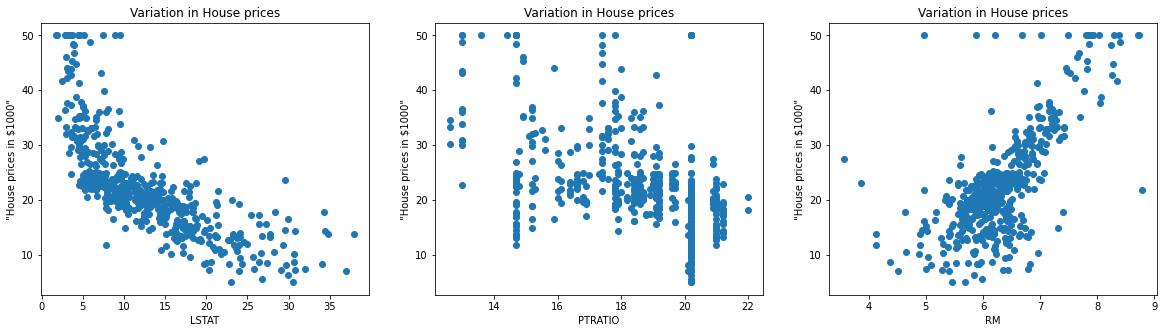

In [ ]:
#From the above summary statistics we can see which features would be best to plot against our price.

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'PTRATIO', 'RM']
target = bd['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bd[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

Text(0.5, 1.0, 'RM to PRICE')

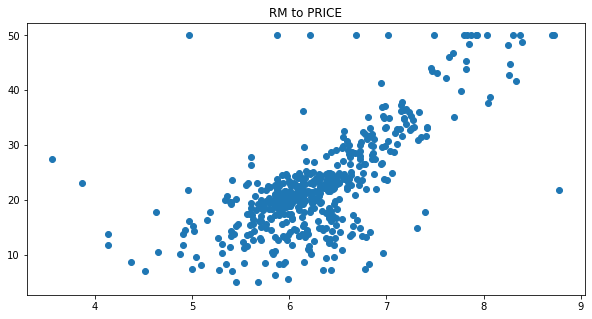

In [ ]:
#The best of the two is a positive correlation with RM and a negative correlation with LSTAT. We will use RM for our Regression training
# Let us do LSTAT first by making it have positive correlation

plt.figure(figsize=(10, 5))

X = bd.RM
#convert to numpy
X = X.to_numpy()


Y = bd.PRICE
#convert to numpy
Y = Y.to_numpy()

plt.scatter(X, Y)
plt.title("RM to PRICE")

# Part 3: Instantiate the Model and Train ("fit") the model

In [ ]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)
])

#Configures the model for training.
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')


# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
16/16 [==============================] - 0s 1ms/step - loss: 182.1857
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 78.3637
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 63.1942
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 60.5639
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 59.3055
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 58.6814
Epoch 7/200
16/16 [==============================] - 0s 1ms/step - loss: 59.4651
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 59.0561
Epoch 9/200
16/16 [==============================] - 0s 1ms/step - loss: 58.5543
Epoch 10/200
16/16 [==============================] - 0s 1ms/step - loss: 58.9182
Epoch 11/200
16/16 [==============================] - 0s 1ms/step - loss: 58.0552
Epoch 12/200
16/16 [==============================] - 0s 1ms/step - loss: 59.0398
Epoch 13/200
16/16 [====

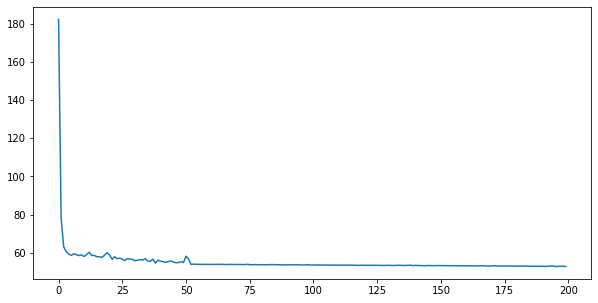

In [ ]:
plt.figure(figsize=(10, 5))

# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [ ]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[4.7921333]], dtype=float32), array([-7.2959313], dtype=float32)]


In [ ]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

# Part 4: Evaluate the Model

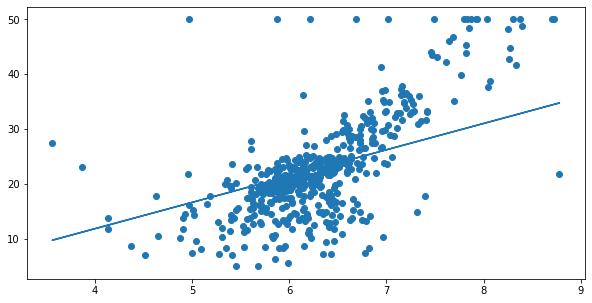

In [ ]:
plt.figure(figsize=(10, 5))

# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

# Part 5: Training, Fitting, and Evaluating the Model with all Features

In [ ]:
# Getting our new Inputs and Target as numpy arrays
Y = bd['PRICE']
Y = Y.to_numpy()

X = bd.drop('PRICE', axis = 1)
X = X.to_numpy()

In [ ]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split


# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
N, D = X_train.shape

In [ ]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# instantiate a classifer and train it
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# evaluate the model's performance
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))


0.7433139222123972
0.7204589490150342


In [ ]:
#how you can make predictions
predictions = model.predict(X_test)
predictions

array([25.32909944, 24.98599116, 22.81714469, 20.67716185, 18.54529548,
       32.52882928, 26.53410617, 21.09830899, 15.61196146, 25.11121199,
       36.98114928, 38.79388839, 15.59886226, 27.77816535, 16.3630538 ,
        5.46361768, 12.15264651, 21.4009643 ,  0.64927614, 23.50267547,
       23.06989407, 13.27084725, 25.78682758,  8.41033536, 28.66387713,
       20.80654289, 19.37894931, 25.75409921, 18.05787118, 17.20778275,
       32.93985558, 18.13997464, 29.71976661, 27.4482382 ,  9.3808673 ,
       27.18723952, 17.20554838, 25.10283582, 30.3460225 , 28.30834481,
       13.04700149, 25.17389651, 15.73460065, 31.50242767, 27.16519443,
       22.10488467, 13.13238037, 28.3513295 , 20.35697354, 18.39894884,
       17.69827764, 16.21313097, 24.24325262, 29.29008597, 16.29591897,
       18.80609688, 35.3133207 ,  4.96210925,  4.71822313, 23.22685496,
       30.65654477, 17.20152218, 33.13728281,  2.05085536, 20.89480167,
       19.61961073, 14.19666353, 21.97688905, 17.45235249, 27.19

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

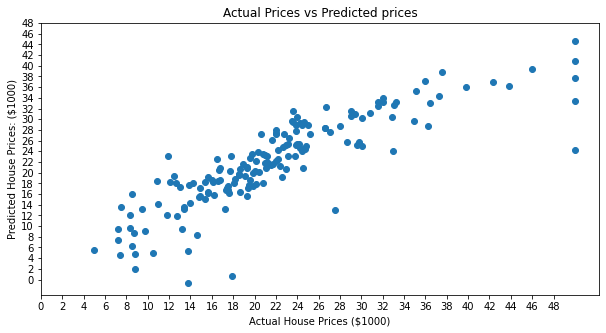

In [ ]:
#Visualization

plt.figure(figsize=(10, 5))

plt.scatter(y_test, predictions)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted House Prices: ($1000)")
plt.xticks(range(0, int(max(y_test)),2))
plt.yticks(range(0, int(max(y_test)),2))
plt.title("Actual Prices vs Predicted prices")